<a href="https://colab.research.google.com/github/yubrajt/GoldPricePrediction/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

Import the data

In [6]:
data= pd.read_csv('/content/gld_price_data.csv')

In [7]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Data Analysis

In [10]:
data.shape

(2290, 6)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
#Detect missing values
data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [14]:
#check if there are duplicate or not
data.duplicated().sum()

0

In [15]:
#returns the number of unique values for each column.
data.nunique()

Date       2290
SPX        2277
GLD        1930
USO        1514
SLV        1331
EUR/USD    2066
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe753a39250>,
      dtype=object)

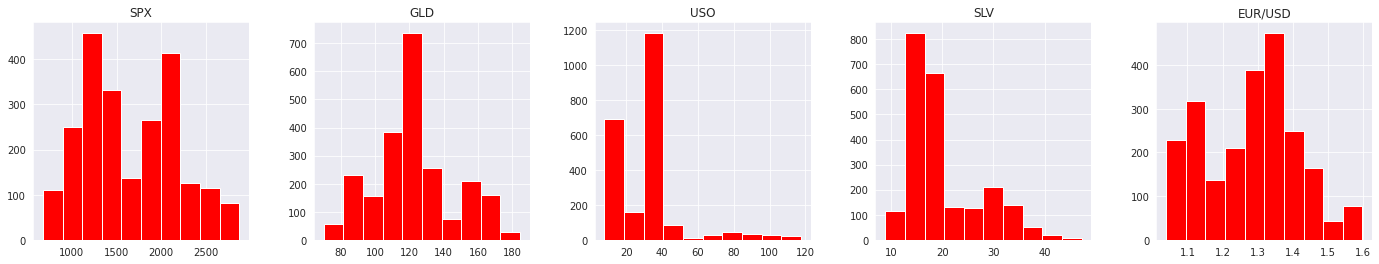

In [16]:
#presenting inthe histogram
data.hist(figsize=(24,4),layout=(1,5),color='red')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe753790790>],
      dtype=object)

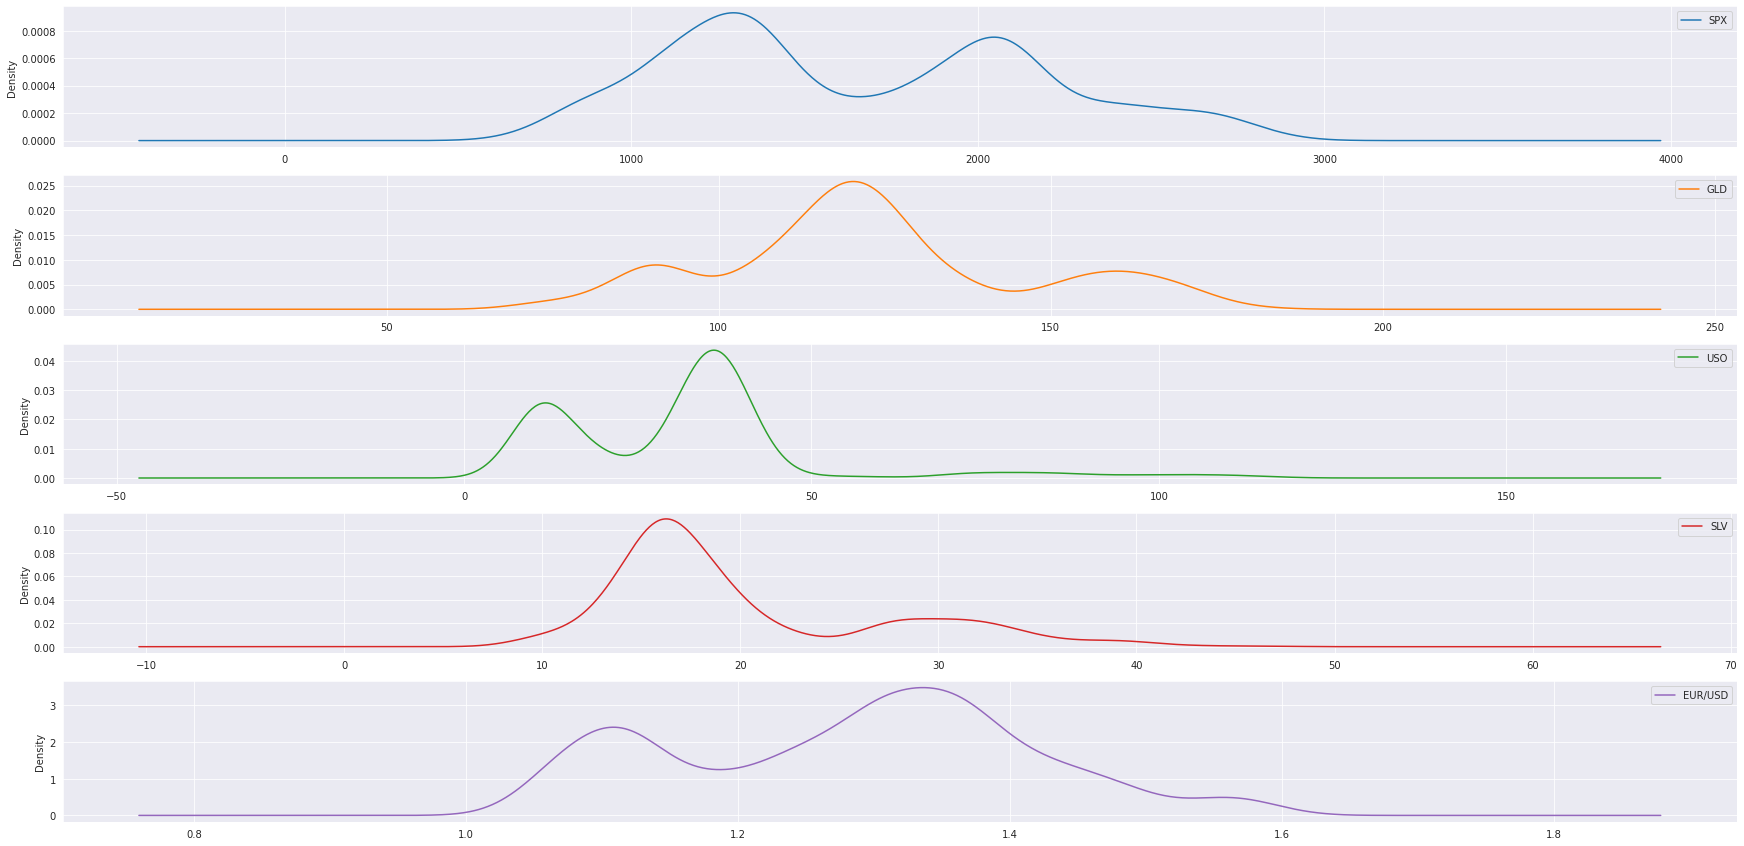

In [17]:
#plotting the data KDE represents the data using a continuous probability density curve in one or more dimensions.
data.plot(kind="kde",subplots=True,layout=(5,1),figsize=(30,15),sharex=False,sharey=False)

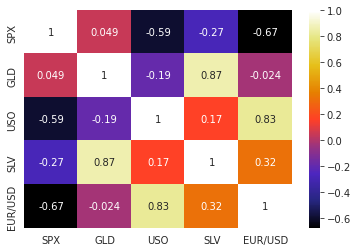

In [18]:
#annot represent the value of each box
plt.figure()
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.CMRmap)

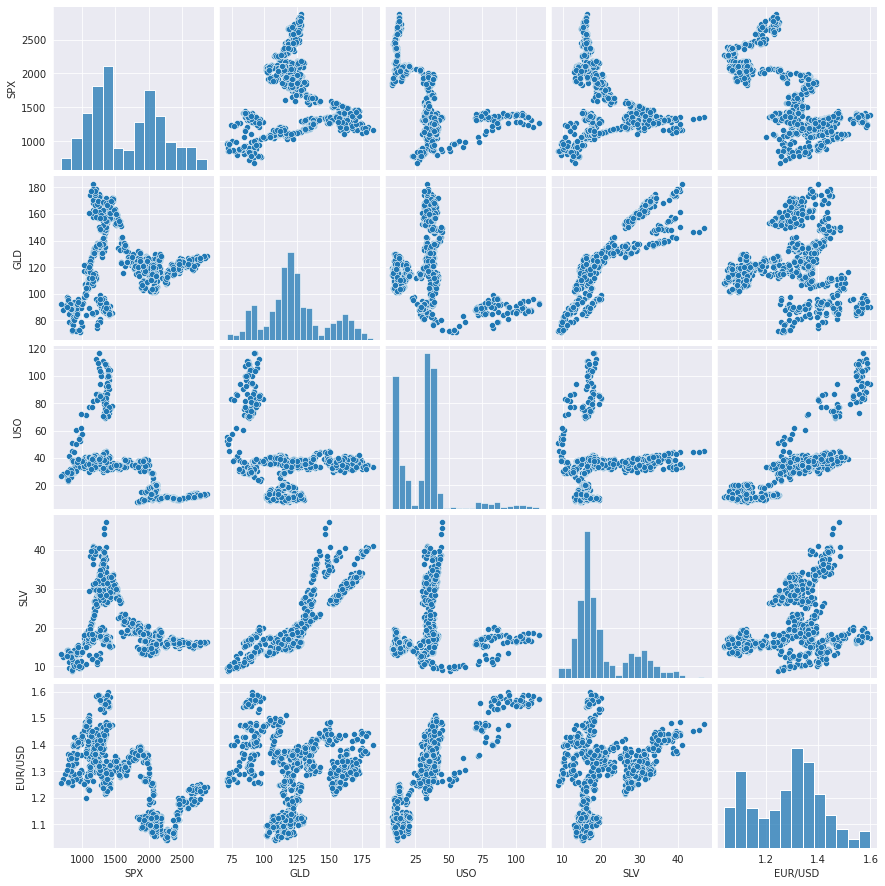

In [19]:
#collected sample of 1000   we can do of may be 100 or  others
sns.pairplot(data.sample(n=1000))

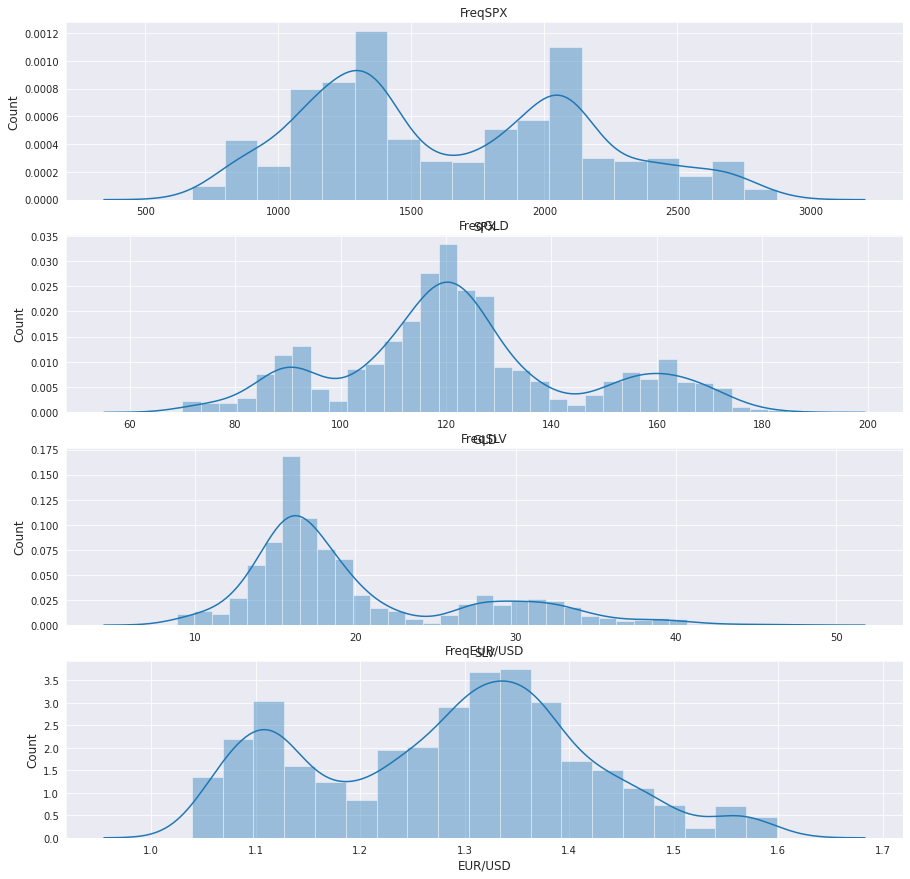

In [39]:
from ctypes import alignment
col_names=['SPX','GLD','SLV','EUR/USD']
fig , ax =  plt.subplots(len(col_names),figsize=(15,15))
for i , col_val in enumerate(col_names):

  sns.distplot(data[col_val],hist=True,ax=ax[i])
  ax[i].set_title('Freq'+ col_val,fontsize=12)
  ax[i].set_xlabel(col_val,fontsize=12)
  ax[i].set_ylabel("Count",fontsize=12)

  


plt.show()